In [ ]:
import os
from sklearn.datasets import fetch_lfw_people
import cv2

# Step 1: Download the LFW Dataset
def download_lfw_dataset(min_faces_per_person=100, resize=0.4):

    print("Downloading the LFW dataset...")
    lfw_data = fetch_lfw_people(min_faces_per_person=min_faces_per_person, resize=resize, download_if_missing=True)
    print("Download complete!")
    return lfw_data.images, lfw_data.target, lfw_data.target_names

# Step 2: Save Dataset Locally
def save_dataset(images, labels, label_names, output_dir="./lfw_dataset"):

    print(f"Saving dataset to {output_dir}...")
    os.makedirs(output_dir, exist_ok=True)

    for idx, img in enumerate(images):
        # Get the person's name using the label
        person_name = label_names[labels[idx]]
        person_dir = os.path.join(output_dir, person_name)
        os.makedirs(person_dir, exist_ok=True)

        # Save the image as a file
        image_path = os.path.join(person_dir, f"image_{idx}.jpg")
        cv2.imwrite(image_path, img * 255)  # Scale back pixel values to 0-255

    print(f"Dataset saved to {output_dir}")

# Main Script
if __name__ == "__main__":
    # Download the dataset
    images, labels, label_names = download_lfw_dataset(min_faces_per_person=100, resize=0.4)

    # Save the dataset locally
    save_dataset(images, labels, label_names)

Download complete!
Saving dataset to ./lfw_dataset...
Dataset saved to ./lfw_dataset


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage.color import rgb2gray

Step 1: Load the Dataset

The Labeled Faces in the Wild dataset comes with sklearn

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
images = lfw_people.images
labels = lfw_people.target
target_names = lfw_people.target_names

print(f"Dataset contains {len(images)} images across {len(target_names)} classes.")

Dataset contains 1288 images across 7 classes.


Step 2: Preprocess Images (Resize is already handled; convert to grayscale if not done)

Grayscale conversion is not needed as the dataset is already grayscale

Let's visualize some images to understand the data

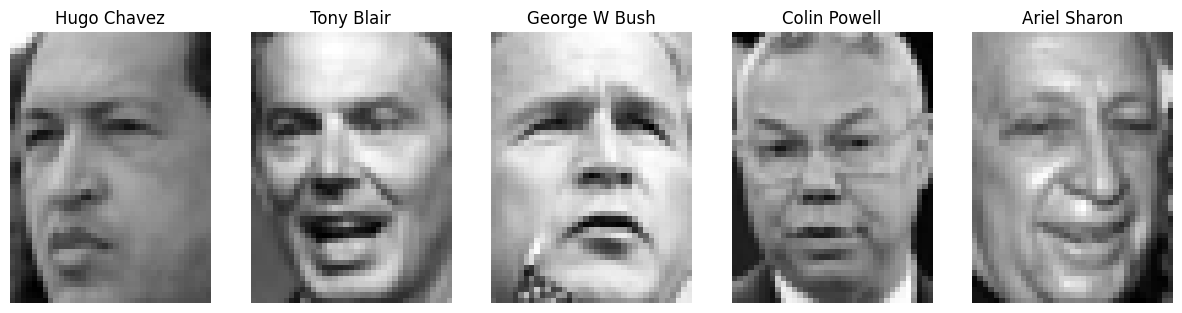

In [ ]:
fig, ax = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(target_names[labels[i]])
    ax[i].axis('off')
plt.show()

Step 3: Feature Extraction using HOG (Histogram of Oriented Gradients)

Define a function to extract HOG features

In [ ]:
def extract_hog_features(images):
    hog_features = []
    for image in images:
        features = hog(
            image,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            block_norm='L2-Hys',
            visualize=False
        )
        hog_features.append(features)
    return np.array(hog_features)

hog_features = extract_hog_features(images)
print(f"Extracted HOG features shape: {hog_features.shape}")

Extracted HOG features shape: (1288, 540)


Step 4: Split the Data
Divide the data into training and testing sets (80% train, 20% test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.2, random_state=42)

Step 5: Train the Model

Use a Support Vector Machine (SVM) classifier

In [ ]:
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
print("SVM model trained successfully!")

SVM model trained successfully!


Step 6: Make Predictions

In [ ]:
y_pred = svm_model.predict(X_test)

Step 7: Evaluate the Model

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.84
Precision: 0.85
Recall: 0.84


Step 8: Test the Model on a Random Image

Select a random image from the test set

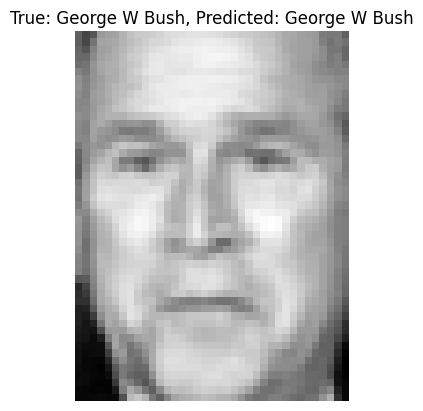

In [ ]:
random_index = np.random.randint(0, len(X_test))
test_image = X_test[random_index].reshape(1, -1)
true_label = y_test[random_index]
predicted_label = svm_model.predict(test_image)[0]

plt.imshow(images[random_index], cmap='gray')
plt.title(f"True: {target_names[true_label]}, Predicted: {target_names[predicted_label]}")
plt.axis('off')
plt.show()

In [ ]:
from skimage.feature import hog

def extract_hog_features(images, pixels_per_cell=(8, 8), cells_per_block=(2, 2), orientations=9):

    print("Extracting HOG features...")
    hog_features = []
    for img in images:
        features = hog(
            img,
            orientations=orientations,
            pixels_per_cell=pixels_per_cell,
            cells_per_block=cells_per_block,
            block_norm='L2-Hys'
        )
        hog_features.append(features)
    print("HOG feature extraction complete!")
    return np.array(hog_features)

hog_features = extract_hog_features(images)

print(f"HOG Features Shape: {hog_features.shape}")


Extracting HOG features...
HOG feature extraction complete!
HOG Features Shape: (1288, 540)


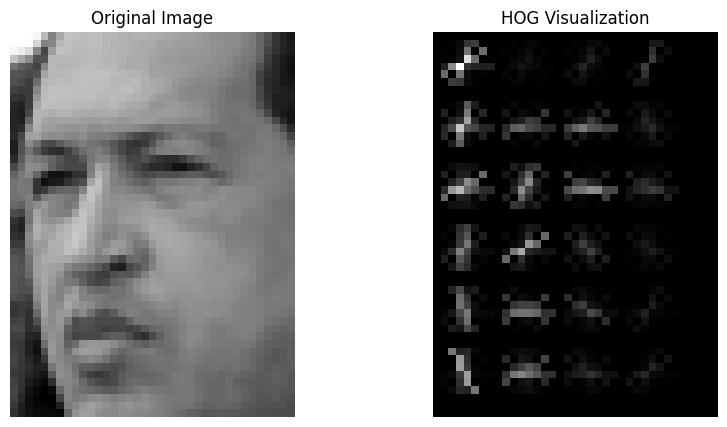

In [ ]:
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

sample_image = images[0]

_, hog_visualization = hog(
    sample_image,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(sample_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_visualization, cmap='gray')
plt.title("HOG Visualization")
plt.axis('off')

plt.show()